# Team Benchmark

**Authors:** Marissa Nicole Esteban, Gabe Krishnadasan, Diana Montoya-Herrera, Gabe Seidl, Madeleine Woo, Daniel Matlock

**Date:** 10/5/2023

### Wave Height

#### Dataset: https://www.kaggle.com/code/shaltaf/the-prediction-of-significant-wave-height-hs/notebook 

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

In [1]:
# import libraries needed
from seebuoy import NDBC
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from datetime import datetime, timedelta

In [2]:
import pandas as pd
from seebuoy import NDBC

In [3]:
ndbc = NDBC(timeframe="historical")

In [4]:
df_avail = ndbc.available_data(station_id="44097")

In [5]:
df_data = ndbc.get_data("44097")

df_data

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,air_temp,water_temp,dewpoint,visibility,pressure_tendency,tide
date,,,,,,,,,,,,,,
2009-10-21 23:31:00,NaN,NaN,NaN,0.59,8.33,5.49,139.0,9999.0,NaN,14.1,NaN,NaN,NaN,NaN
2009-10-22 00:01:00,NaN,NaN,NaN,0.65,8.33,5.73,139.0,9999.0,NaN,14.1,NaN,NaN,NaN,NaN
2009-10-22 00:31:00,NaN,NaN,NaN,0.57,8.33,5.40,141.0,9999.0,NaN,14.1,NaN,NaN,NaN,NaN
2009-10-22 01:01:00,NaN,NaN,NaN,0.55,5.88,5.32,173.0,9999.0,NaN,14.1,NaN,NaN,NaN,NaN
2009-10-22 01:31:00,NaN,NaN,NaN,0.57,7.69,5.40,139.0,9999.0,NaN,14.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-11 18:26:00,NaN,NaN,NaN,1.00,6.00,5.70,148.0,NaN,NaN,6.8,NaN,NaN,NaN,NaN
2024-04-11 18:56:00,NaN,NaN,NaN,1.10,7.00,5.80,136.0,NaN,NaN,6.8,NaN,NaN,NaN,NaN
2024-04-11 19:26:00,NaN,NaN,NaN,1.10,7.00,6.00,125.0,NaN,NaN,6.8,NaN,NaN,NaN,NaN


In [6]:
# dropping cols where there is 100% NA
df_data.dropna(axis=1, how='all', inplace=True)

# dropping rows where average_period is null
df_data.dropna(subset=['average_period'], inplace=True)

# dropping rows wehre wave_height is null
df_data.dropna(subset=['wave_height'], inplace=True)

In [7]:
# missing data
total_na = df_data.isnull().sum().sort_values(ascending=False)

total_rows = df_data.isnull().count()
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total_na, total_rows, percent], axis=1, keys=['Total NA', 'Total Rows', 'Percent'])
missing_data

,Total NA,Total Rows,Percent
water_temp,5156,224929,2.292279
pressure,2177,224929,0.967861
mean_wave_direction,339,224929,0.150714
wave_height,0,224929,0.000000
dominant_period,0,224929,0.000000
average_period,0,224929,0.000000


In [8]:
df_data

,wave_height,dominant_period,average_period,mean_wave_direction,pressure,water_temp
date,,,,,,
2009-10-21 23:31:00,0.59,8.33,5.49,139.0,9999.0,14.1
2009-10-22 00:01:00,0.65,8.33,5.73,139.0,9999.0,14.1
2009-10-22 00:31:00,0.57,8.33,5.40,141.0,9999.0,14.1
2009-10-22 01:01:00,0.55,5.88,5.32,173.0,9999.0,14.1
2009-10-22 01:31:00,0.57,7.69,5.40,139.0,9999.0,14.1
...,...,...,...,...,...,...
2024-04-11 18:26:00,1.00,6.00,5.70,148.0,NaN,6.8
2024-04-11 18:56:00,1.10,7.00,5.80,136.0,NaN,6.8
2024-04-11 19:26:00,1.10,7.00,6.00,125.0,NaN,6.8


In [9]:
df_data = df_data.reset_index()
#ny_buoy["average_period_0_for_null"] = ny_buoy["average_period"].fillna(0)

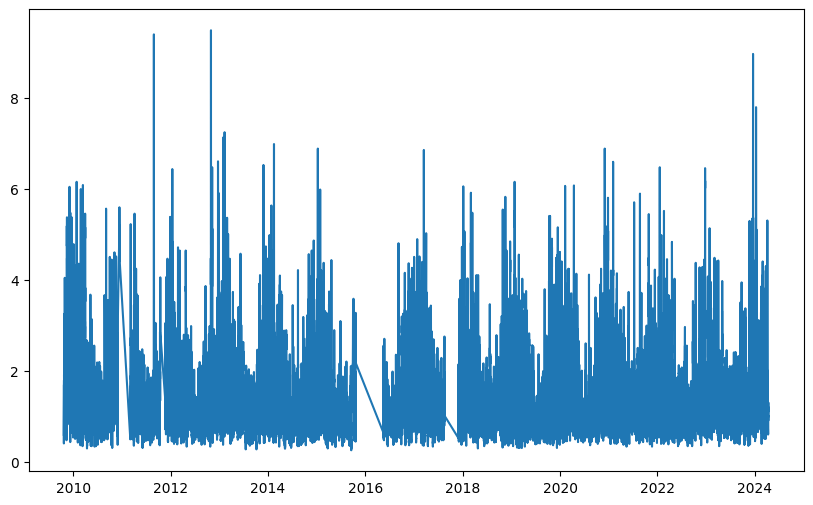

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df_data["date"], df_data["wave_height"]) # including NULL values

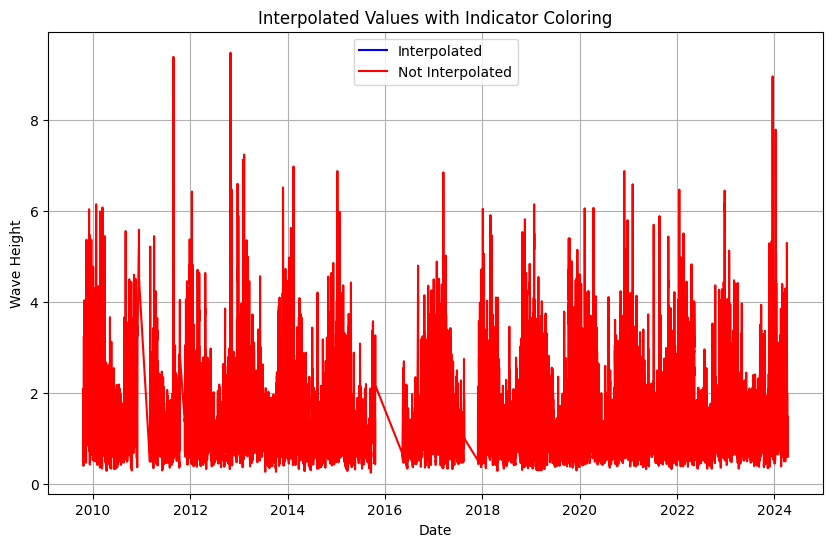

In [76]:
# lets limit the df to 2 columns: date and wave height
ny_buoy_df = df_data[["date","wave_height", "average_period"]]

# Set 'date' column as the index
ny_buoy_df = ny_buoy_df.set_index("date")

ny_buoy_df['wave_height_interpolated'] = ny_buoy_df['wave_height'].interpolate(method='time') # interpolate missing values based on time
ny_buoy_df['average_period_interpolated'] = ny_buoy_df['average_period'].interpolate(method='time') # interpolate missing values based on time
ny_buoy_df['interpolation_indicator'] = ny_buoy_df['wave_height'].isna()
ny_buoy_df['interpolation_indicator'] = ny_buoy_df['average_period'].isna()

ny_buoy_df = ny_buoy_df.reset_index()

plt.figure(figsize=(10, 6))
#plt.plot(ny_buoy_df["average_period"]) # interpolated NULL values

plt.plot(ny_buoy_df['date'][ny_buoy_df['interpolation_indicator']], ny_buoy_df['wave_height_interpolated'][ny_buoy_df['interpolation_indicator']], color='blue', label='Interpolated')
plt.plot(ny_buoy_df['date'], ny_buoy_df['wave_height'], color='red', label='Not Interpolated')

plt.xlabel('Date')
plt.ylabel('Wave Height')
plt.title('Interpolated Values with Indicator Coloring')
plt.legend()

plt.grid(True)
plt.show()

In [12]:
# lets use the interpolated values and see how good we are at modeling the future
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [13]:
modeling_df = ny_buoy_df[["date","wave_height_interpolated"]]
modeling_df = modeling_df.rename(columns={"date": "ds", "wave_height_interpolated": "y"})
cap = 6

# Initialize Prophet model
modeling_df['cap'] = cap
model = Prophet(growth="logistic")
model.fit(modeling_df)

14:32:53 - cmdstanpy - INFO - Chain [1] start processing
14:33:55 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
modeling_df

,ds,y,cap
0,2009-10-21 23:31:00,0.59,6
1,2009-10-22 00:01:00,0.65,6
2,2009-10-22 00:31:00,0.57,6
3,2009-10-22 01:01:00,0.55,6
4,2009-10-22 01:31:00,0.57,6
...,...,...,...
224924,2024-04-11 18:26:00,1.00,6
224925,2024-04-11 18:56:00,1.10,6
224926,2024-04-11 19:26:00,1.10,6
224927,2024-04-11 19:56:00,1.00,6


In [15]:
future = model.make_future_dataframe(periods=15)
future['cap'] = cap
forecast = model.predict(future)

In [16]:
forecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-10-21 23:31:00,1.491845,6,0.639240,2.508115,1.491845,1.491845,0.069760,0.069760,0.069760,-0.000069,-0.000069,-0.000069,-0.024055,-0.024055,-0.024055,0.093885,0.093885,0.093885,0.0,0.0,0.0,1.561606
1,2009-10-22 00:01:00,1.491847,6,0.694789,2.505214,1.491847,1.491847,0.074664,0.074664,0.074664,0.004564,0.004564,0.004564,-0.023919,-0.023919,-0.023919,0.094019,0.094019,0.094019,0.0,0.0,0.0,1.566510
2,2009-10-22 00:31:00,1.491848,6,0.592113,2.535414,1.491848,1.491848,0.079047,0.079047,0.079047,0.008667,0.008667,0.008667,-0.023774,-0.023774,-0.023774,0.094154,0.094154,0.094154,0.0,0.0,0.0,1.570895
3,2009-10-22 01:01:00,1.491849,6,0.574686,2.562265,1.491849,1.491849,0.082725,0.082725,0.082725,0.012056,0.012056,0.012056,-0.023619,-0.023619,-0.023619,0.094289,0.094289,0.094289,0.0,0.0,0.0,1.574575
4,2009-10-22 01:31:00,1.491851,6,0.623343,2.500009,1.491851,1.491851,0.085592,0.085592,0.085592,0.014623,0.014623,0.014623,-0.023455,-0.023455,-0.023455,0.094424,0.094424,0.094424,0.0,0.0,0.0,1.577442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224939,2024-04-22 20:26:00,1.361948,6,0.439386,2.274232,1.361945,1.361945,-0.013706,-0.013706,-0.013706,-0.026434,-0.026434,-0.026434,-0.002633,-0.002633,-0.002633,0.015362,0.015362,0.015362,0.0,0.0,0.0,1.348242
224940,2024-04-23 20:26:00,1.361927,6,0.379008,2.374129,1.361924,1.361924,-0.033253,-0.033253,-0.033253,-0.026434,-0.026434,-0.026434,-0.017028,-0.017028,-0.017028,0.010210,0.010210,0.010210,0.0,0.0,0.0,1.328674
224941,2024-04-24 20:26:00,1.361905,6,0.393777,2.305174,1.361902,1.361902,-0.046785,-0.046785,-0.046785,-0.026434,-0.026434,-0.026434,-0.024683,-0.024683,-0.024683,0.004333,0.004333,0.004333,0.0,0.0,0.0,1.315121
224942,2024-04-25 20:26:00,1.361884,6,0.342232,2.344637,1.361880,1.361880,-0.038347,-0.038347,-0.038347,-0.026434,-0.026434,-0.026434,-0.009666,-0.009666,-0.009666,-0.002246,-0.002246,-0.002246,0.0,0.0,0.0,1.323537


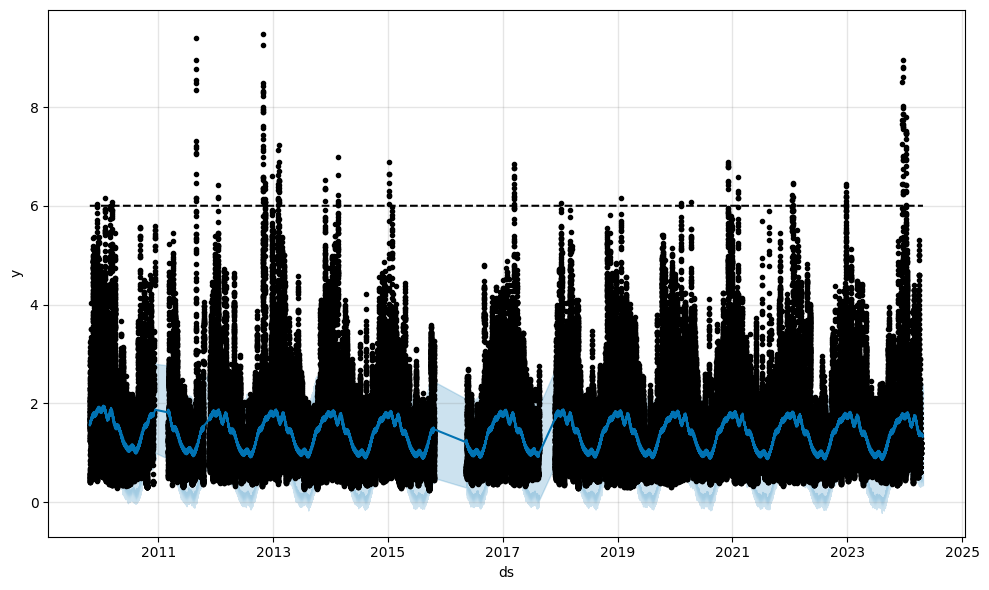

In [17]:
fig1 = model.plot(forecast)

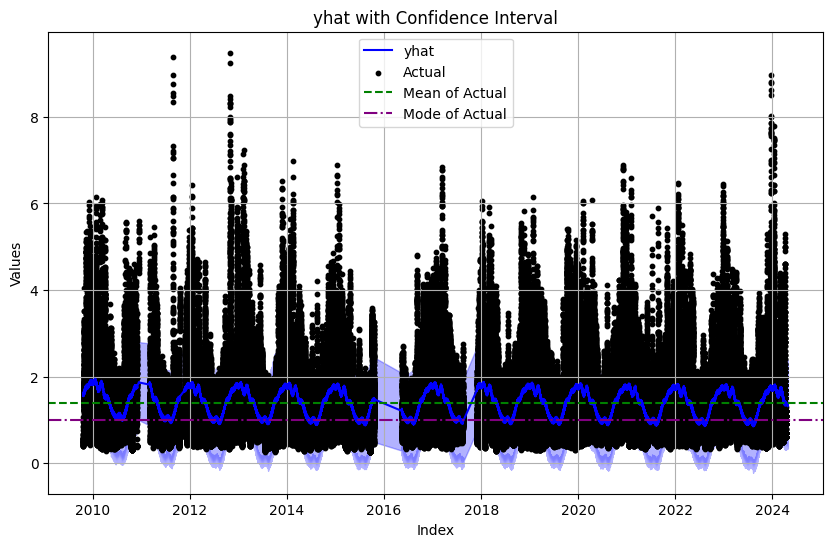

In [18]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(forecast['ds'], forecast['yhat'], label='yhat', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.3)
plt.scatter(modeling_df['ds'], modeling_df['y'], label='Actual', color='black', marker='o', s=10)

mean_actual = modeling_df['y'].mean()
mode_actual = modeling_df['y'].mode()[0]

plt.axhline(mean_actual, color='green', linestyle='--', label='Mean of Actual')
plt.axhline(mode_actual, color='purple', linestyle='-.', label='Mode of Actual')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('yhat with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
ny_buoy_df['date'] = pd.to_datetime(ny_buoy_df["date"])

In [78]:
def rmse(y_true, y_pred):
    """
    Compute Root Mean Squared Error (RMSE).
    
    Parameters:
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
        
    y_pred : array-like of shape (n_samples,)
        Estimated target values.

    Returns:
    float
        The RMSE value.
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [81]:
def doit(f, c, target):
    """
    Parameters:
    f : floor value, how many days back to train the model on

    c : ceiling value, how many days we want to predict for (want 10-15 days)

    target : either "wave_height" or "average_period". Variable we want to traiun and predict on.
    """
    if target != "wave_height" and target != "average_period":
        print("Not a valid target variable")
        return

    #Sets up date objects and floor and ceiling
    today_date = datetime.today().date()
    floor = f + c
    ceiling = c

    # Calculate the floordate and the ceiling date
    floorDate = today_date - timedelta(days=floor)
    ceilingDate = today_date - timedelta(days=ceiling)

    # Splits up the df into recent and past
    # Recent holds the 15 most recent days of data
    # Past holds all data from the floor to the ceiling
    recent_df = ny_buoy_df[ny_buoy_df['date'] > pd.Timestamp(ceilingDate)]
    past_df = ny_buoy_df[(ny_buoy_df['date'] > pd.Timestamp(floorDate)) & (ny_buoy_df['date'] < pd.Timestamp(ceilingDate))]

    #Sets up the modeling df with the date and target variable column as well as the cap for logistic growth prophet algo
    modeling_df = past_df[["date",f'{target}_interpolated']]
    modeling_df = modeling_df.rename(columns={"date": "ds", f'{target}_interpolated': "y"})
    cap = modeling_df['y'].max() + 1

    # Initialize Prophet model with the cap
    model = Prophet(growth="logistic")
    modeling_df['cap'] = cap
    model.fit(modeling_df)

    #Makes prediction
    future = model.make_future_dataframe(periods=ceiling)
    future['cap'] = cap
    forecast = model.predict(future)

    forecast['date'] = forecast['ds']
    merged_df = pd.merge(forecast.tail(15), recent_df, on='date', how='left')

    print(f"RMSE for {ceiling} days using {floor - 15} days worth of training data for {target}")
    print(rmse(merged_df[f'{target}_interpolated'], merged_df["yhat"]))
    print()

In [82]:
for i in range(365, 1460, 365):
    doit(i, 15, "average_period")

15:23:03 - cmdstanpy - INFO - Chain [1] start processing
15:23:07 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 365 days worth of training data for average_period
1.2206615260432754



15:23:11 - cmdstanpy - INFO - Chain [1] start processing
15:23:24 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 730 days worth of training data for average_period
1.2438993856421765



15:23:34 - cmdstanpy - INFO - Chain [1] start processing
15:23:52 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 1095 days worth of training data for average_period
1.3199363200490066



In [58]:
for i in range(100, 1000, 100):
    doit(i, 15)

14:52:51 - cmdstanpy - INFO - Chain [1] start processing
14:52:52 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 85 days worth of training data
1.0971494859175965



14:52:53 - cmdstanpy - INFO - Chain [1] start processing
14:52:54 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 185 days worth of training data
1.0059962403815084



14:52:56 - cmdstanpy - INFO - Chain [1] start processing
14:52:58 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 285 days worth of training data
0.9340488282899889



14:53:01 - cmdstanpy - INFO - Chain [1] start processing
14:53:04 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 385 days worth of training data
0.9462546055203206



14:53:08 - cmdstanpy - INFO - Chain [1] start processing
14:53:14 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 485 days worth of training data
0.9298218697145016



14:53:19 - cmdstanpy - INFO - Chain [1] start processing
14:53:26 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 585 days worth of training data
0.9562125529508494



14:53:31 - cmdstanpy - INFO - Chain [1] start processing
14:53:46 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 685 days worth of training data
0.977828880097748



14:53:54 - cmdstanpy - INFO - Chain [1] start processing
14:54:04 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 785 days worth of training data
0.8445352299208403



14:54:13 - cmdstanpy - INFO - Chain [1] start processing
14:54:24 - cmdstanpy - INFO - Chain [1] done processing


RMSE for 15 days using 885 days worth of training data
0.8433140756347907



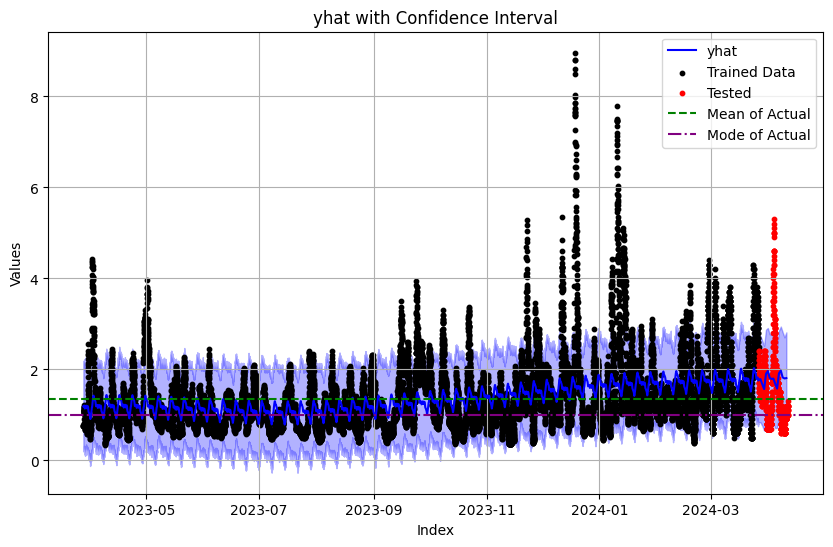

In [42]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(forecast['ds'], forecast['yhat'], label='yhat', color='blue')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.3)
plt.scatter(modeling_df['ds'], modeling_df['y'], label='Trained Data', color='black', marker='o', s=10)
plt.scatter(recent_df['date'], recent_df['wave_height_interpolated'], label='Tested', color='red', marker='o', s=10)

mean_actual = modeling_df['y'].mean()
mode_actual = modeling_df['y'].mode()[0]

plt.axhline(mean_actual, color='green', linestyle='--', label='Mean of Actual')
plt.axhline(mode_actual, color='purple', linestyle='-.', label='Mode of Actual')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('yhat with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

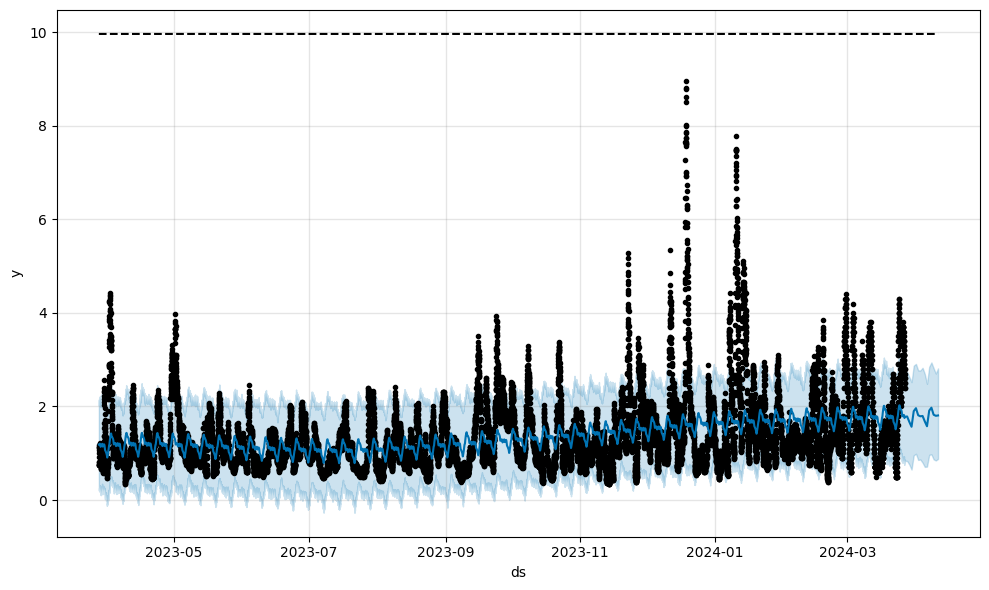

In [43]:
fig1 = model.plot(forecast)